<a href="https://colab.research.google.com/github/mayankdeshmukh/Data-Science-and-Machine-Learning/blob/main/Association_Rules.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing Libraries 

In [ ]:
!pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
!pip install mlxtend

In [ ]:
titanic = pd.read_csv("/content/Titanic.csv")
titanic

,Class,Gender,Age,Survived
0,3rd,Male,Child,No
1,3rd,Male,Child,No
2,3rd,Male,Child,No
3,3rd,Male,Child,No
4,3rd,Male,Child,No
...,...,...,...,...
2196,Crew,Female,Adult,Yes
2197,Crew,Female,Adult,Yes
2198,Crew,Female,Adult,Yes
2199,Crew,Female,Adult,Yes


# Pre-Processing
As the data is not in transaction formation 
We are using transaction Encoder

In [ ]:
df=pd.get_dummies(titanic)
df.head()

,Class_1st,Class_2nd,Class_3rd,Class_Crew,Gender_Female,Gender_Male,Age_Adult,Age_Child,Survived_No,Survived_Yes
0,0,0,1,0,0,1,0,1,1,0
1,0,0,1,0,0,1,0,1,1,0
2,0,0,1,0,0,1,0,1,1,0
3,0,0,1,0,0,1,0,1,1,0
4,0,0,1,0,0,1,0,1,1,0


# Apriori Algorithm 

In [ ]:
frequent_itemsets = apriori(df, min_support=0.1, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.147660,(Class_1st)
1,0.129487,(Class_2nd)
2,0.320763,(Class_3rd)
3,0.402090,(Class_Crew)
4,0.213539,(Gender_Female)
5,0.786461,(Gender_Male)
6,0.950477,(Age_Adult)
7,0.676965,(Survived_No)
8,0.323035,(Survived_Yes)
9,0.144934,"(Class_1st, Age_Adult)"


In [ ]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.7)
rules
rules.sort_values('lift',ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
65,"(Gender_Female, Age_Adult)",(Survived_Yes),0.193094,0.323035,0.143571,0.743529,2.301699,0.081195,2.639542
68,(Survived_Yes),"(Gender_Female, Age_Adult)",0.323035,0.193094,0.143571,0.444444,2.301699,0.081195,1.452431
19,(Survived_Yes),(Gender_Female),0.323035,0.213539,0.156293,0.483826,2.265745,0.087312,1.523634
18,(Gender_Female),(Survived_Yes),0.213539,0.323035,0.156293,0.731915,2.265745,0.087312,2.525187
67,(Gender_Female),"(Survived_Yes, Age_Adult)",0.213539,0.297138,0.143571,0.672340,2.262724,0.080121,2.145099
...,...,...,...,...,...,...,...,...,...
4,(Gender_Male),(Class_3rd),0.786461,0.320763,0.231713,0.294627,0.918520,-0.020555,0.962947
79,"(Gender_Male, Survived_No, Age_Adult)",(Class_3rd),0.603816,0.320763,0.175829,0.291196,0.907823,-0.017853,0.958286
90,(Class_3rd),"(Gender_Male, Survived_No, Age_Adult)",0.320763,0.603816,0.175829,0.548159,0.907823,-0.017853,0.876820
29,"(Gender_Male, Age_Adult)",(Class_3rd),0.757383,0.320763,0.209905,0.277145,0.864016,-0.033036,0.939658


#####  An leverage value of 0 indicates independence. Range will be [-1 1]
A high conviction value means that the consequent is highly depending on the antecedent and range [0 inf]

In [ ]:
rules.sort_values('lift',ascending = False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
65,"(Gender_Female, Age_Adult)",(Survived_Yes),0.193094,0.323035,0.143571,0.743529,2.301699,0.081195,2.639542
68,(Survived_Yes),"(Gender_Female, Age_Adult)",0.323035,0.193094,0.143571,0.444444,2.301699,0.081195,1.452431
19,(Survived_Yes),(Gender_Female),0.323035,0.213539,0.156293,0.483826,2.265745,0.087312,1.523634
18,(Gender_Female),(Survived_Yes),0.213539,0.323035,0.156293,0.731915,2.265745,0.087312,2.525187
67,(Gender_Female),"(Survived_Yes, Age_Adult)",0.213539,0.297138,0.143571,0.672340,2.262724,0.080121,2.145099
66,"(Survived_Yes, Age_Adult)",(Gender_Female),0.297138,0.213539,0.143571,0.483180,2.262724,0.080121,1.521732
101,"(Survived_No, Class_Crew)","(Gender_Male, Age_Adult)",0.305770,0.757383,0.304407,0.995542,1.314450,0.072822,54.427079
96,"(Gender_Male, Age_Adult)","(Survived_No, Class_Crew)",0.757383,0.305770,0.304407,0.401920,1.314450,0.072822,1.160764
46,"(Gender_Male, Age_Adult)",(Class_Crew),0.757383,0.402090,0.391640,0.517097,1.286022,0.087104,1.238157
51,(Class_Crew),"(Gender_Male, Age_Adult)",0.402090,0.757383,0.391640,0.974011,1.286022,0.087104,9.335480


In [ ]:
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Class_1st),(Age_Adult),0.147660,0.950477,0.144934,0.981538,1.032680,0.004587,2.682493
1,(Age_Adult),(Class_1st),0.950477,0.147660,0.144934,0.152486,1.032680,0.004587,1.005694
8,(Class_3rd),(Survived_No),0.320763,0.676965,0.239891,0.747875,1.104747,0.022745,1.281251
9,(Survived_No),(Class_3rd),0.676965,0.320763,0.239891,0.354362,1.104747,0.022745,1.052040
10,(Gender_Male),(Class_Crew),0.786461,0.402090,0.391640,0.497978,1.238474,0.075412,1.191004
...,...,...,...,...,...,...,...,...,...
101,"(Survived_No, Class_Crew)","(Gender_Male, Age_Adult)",0.305770,0.757383,0.304407,0.995542,1.314450,0.072822,54.427079
102,(Age_Adult),"(Gender_Male, Survived_No, Class_Crew)",0.950477,0.304407,0.304407,0.320268,1.052103,0.015075,1.023334
103,(Gender_Male),"(Survived_No, Class_Crew, Age_Adult)",0.786461,0.305770,0.304407,0.387060,1.265851,0.063931,1.132622
104,(Class_Crew),"(Gender_Male, Survived_No, Age_Adult)",0.402090,0.603816,0.304407,0.757062,1.253795,0.061619,1.630802


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f121c8a3c90>,
      dtype=object)

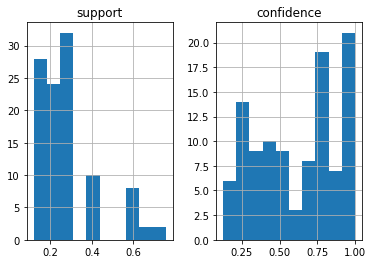

In [ ]:
rules[['support','confidence']].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f121c8a3510>,
      dtype=object)

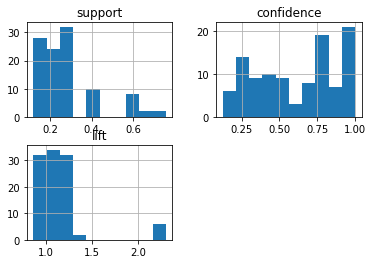

In [ ]:
rules[['support','confidence','lift']].hist()

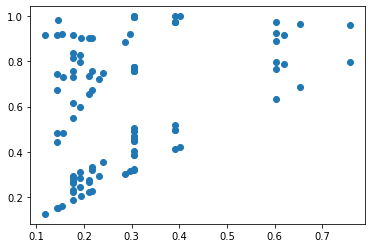

In [ ]:
import matplotlib.pyplot as plt

x = [5,7,8,7,2,17,2,9,4,11,12,9,6]
y = [99,86,87,88,111,86,103,87,94,78,77,85,86]

plt.scatter(rules['support'], rules['confidence'])
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


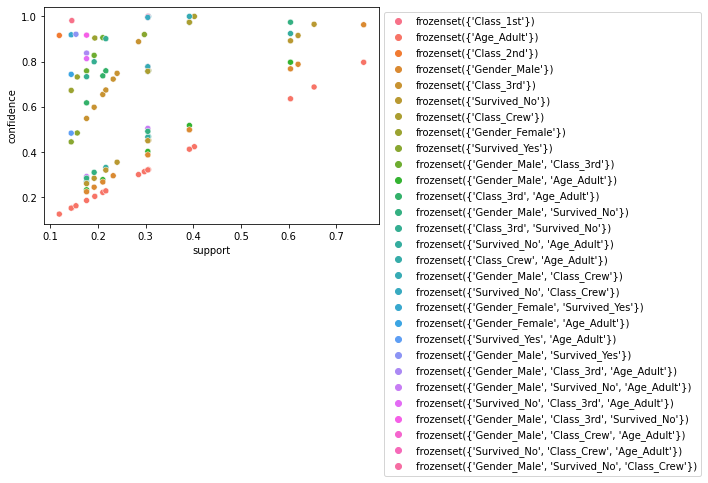

In [ ]:
import seaborn as sns
sns.scatterplot('support', 'confidence', data=rules, hue='antecedents')
plt.legend(loc = 'upper left',bbox_to_anchor = (1,1))
plt.show()

In [ ]:
!pip install nsepython
